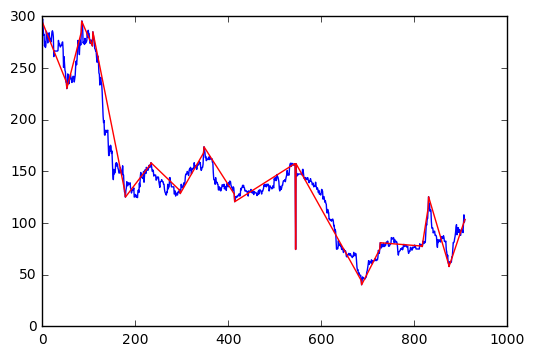

In [9]:
'''
Ref: https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm

尋找歷史股價的趨勢線
'''
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np

from math import *

class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Line(object):
    def __init__(self, a, b):
        self.m = (a.y - b.y) / (a.x - b.x)
        self.k = a.y - self.m * a.x

    def dist(self, p):
        return abs(self.m * p.x - p.y + self.k) / sqrt(self.m ** 2 + 1)


def DouglasPeucker(Points, eps):
    '''
    eps: 當線段上每個點距離這條線都小於eps時, 則認為這一條線就是趨勢線. 否則以距離最大的點為分隔點, 分成左右兩組繼續往下找
    '''
    if len(Points) == 1:
        return [Points[0]]
    line = Line(Points[0], Points[-1])
    Max = 0
    for i in range(1, len(Points) - 1):
        if line.dist(Points[i]) > Max:
            Max = line.dist(Points[i])
            Furthest = i

    res = []
    if Max > eps:
        res1 = DouglasPeucker(Points[:Furthest], eps)
        res2 = DouglasPeucker(Points[Furthest:], eps)
        for i in range(len(res1)):
            res.append(res1[i])
        for i in range(len(res2)):
            res.append(res2[i])

    else:
        res.append(Points[0])
        res.append(Points[-1])

    return res


def plot_stock(stkid, start_time, end_time, epsilon):
    df = web.DataReader(stkid, 'yahoo', start_time, end_time)
    Adj_Close = df['Adj Close']
    
    # plt.xlim(0, 500)
    # plt.ylim(30, 50)
    plt.plot(range(len(Adj_Close)), Adj_Close, c='b')
    Points = []
    for i in range(len(Adj_Close)):
        a = Point(i, float(Adj_Close[i]))
        Points.append(a)

    res = DouglasPeucker(Points, epsilon)
    X = []
    Y = []
    for i in res:
        X.append(i.x)
        Y.append(i.y)

    plt.plot(X, Y, c='r')
    plt.show()

if __name__ == '__main__':
    plot_stock('2498.TW', datetime.datetime(2013, 1, 1), datetime.datetime(2016, 6, 30), 20)

In [2]:
!pip install pandas-datareader

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
